In [ ]:
import polars as pl
import pandas as pd

import os
import plotnine as plt

In [ ]:


def read_dataset_with_metadata(file_path):
    try:
        with open(file_path, 'r', encoding='latin-1') as f:
            metadata_lines = [next(f) for x in range(8)]
    except UnicodeDecodeError:
        print(f"{file_path}")
        return None
    except StopIteration:
        print(f"{file_path} ")
        return None

    metadata = {
        'regiao': metadata_lines[0].split(';')[1].strip(),
        'uf': metadata_lines[1].split(';')[1].strip(),
        'estacao': metadata_lines[2].split(';')[1].strip(),
        'codigo_wmo': metadata_lines[3].split(';')[1].strip(),
        'latitude': float(metadata_lines[4].split(';')[1].strip().replace(',', '.')),
        'longitude': float(metadata_lines[5].split(';')[1].strip().replace(',', '.')),
        'altitude': float(metadata_lines[6].split(';')[1].strip().replace(',', '.')),
        'data_fundacao': metadata_lines[7].split(';')[1].strip()
    }

    try:
        data = pd.read_csv(file_path,
                         sep=';',
                         encoding='latin-1',
                         skiprows=8,
                         decimal=',')
    except pd.errors.ParserError:
        print(f" {file_path}")
        return None

    return {'metadata': metadata, 'data': data}

folder_path = "/content/drive/MyDrive/SulCan"

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.CSV')]

all_data = []

for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    result = read_dataset_with_metadata(file_path)

    if result is not None:
        all_data.append(result['data'])

result = pd.concat(all_data, ignore_index=True)


cb = combined_data
combined_data['Data'] = pd.to_datetime(combined_data['Data'], format='%Y/%m/%d')
for column in combined_data.columns:
    if column != 'Data':

        combined_data[column] = pd.to_numeric(combined_data[column], errors='coerce')

        combined_data[column] = combined_data[column].fillna(0).astype('int64')
new_column_names = [
    'date', 'hora_utc', 'precipitacao_total', 'pressao_atmosferica',
    'pressao_atmosferica_max', 'pressao_atmosferica_min', 'radiacao_global',
    'temperatura_ar', 'temperatura_orvalho', 'temperatura_maxima',
    'temperatura_minima', 'temperatura_orvalho_max', 'temperatura_orvalho_min',
    'umidade_rel_max', 'umidade_rel_min', 'umidade_relativa',
    'vento_direcao', 'vento_rajada_maxima', 'vento_velocidade', 'extra_data'
]

combined_data.columns = new_column_names

combined_data.index.name = 'index'
combined_data.sort_values([ 'date', 'index'], ascending = [True, True], inplace=True)

combined_data = pl.from_pandas(combined_data)

plot1 = (
    plt.ggplot(combined_data)  + plt.aes(x= "date", y = "radiacao_global") + plt.geom_line()
)
plot1
plot1 = (
    plt.ggplot(combined_data)  + plt.aes(x= "date", y = "precipitacao_total") + plt.geom_line()
)
plot1
cb= combined_data
cb
plot1 = (
    plt.ggplot(combined_data[30000:38000])  + plt.aes(x= "date", y = "umidade_relativa") + plt.geom_point()
)
plot1
plot1 = (
    plt.ggplot(combined_data[30000:38000])  + plt.aes(x= "date", y = "vento_velocidade") + plt.geom_pointdensity()
)
plot1
combined_data = combined_data.group_by(pl.col('date')).agg(pl.col("precipitacao_total").mean(), pl.col("vento_velocidade").max(), pl.col("umidade_relativa").mean()).sort('date')
plot1 = (
    plt.ggplot(combined_data)  + plt.aes(x= "date", y = "precipitacao_total") + plt.geom_line()
)
plot1
plot1 = (
    plt.ggplot(combined_data)  + plt.aes(x= "date", y = "vento_velocidade") + plt.geom_point(size =0.1)
)
plot1
combined_data
plot1 = (
    plt.ggplot(combined_data[1400:1700])  + plt.aes(x= "date", y = "umidade_relativa") + plt.geom_point(size = 0.1)
)
plot1
import polars as pl

combined_data = combined_data.sort("date")

window_size = 10

combined_data = combined_data.with_columns([
    pl.col("precipitacao_total").rolling_mean(window_size).alias("precipitacao_total_ma"),
    pl.col("vento_velocidade").rolling_mean(window_size).alias("vento_velocidade_ma"),
    pl.col("umidade_relativa").rolling_mean(window_size).alias("umidade_relativa_ma")
])

print(combined_data)

plot1 = (
    plt.ggplot(combined_data)  + plt.aes(x= "date", y = "precipitacao_total_ma") + plt.geom_line()
)
plot1
plot1 = (
    plt.ggplot(combined_data)  + plt.aes(x= "date", y = "vento_velocidade_ma") + plt.geom_point(size =0.1)
)
plot1
plot1 = (
    plt.ggplot(combined_data[0:1700])  + plt.aes(x= "date", y = "umidade_relativa_ma") + plt.geom_point(size = 0.1)
)
plot1

In [ ]:
cb

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2020/01/01,0000 UTC,0.0,953.8,954.1,953.7,NaN,22.8,21.4,23.6,22.8,22.3,21.4,93.0,91.0,92.0,357.0,8.0,5.0,NaN
1,2020/01/01,0100 UTC,0.0,954.3,954.4,953.7,NaN,22.4,21.4,22.8,22.3,21.5,21.4,95.0,92.0,95.0,349.0,8.6,4.9,NaN
2,2020/01/01,0200 UTC,0.0,954.3,954.7,954.2,NaN,22.0,21.1,22.5,22.0,21.4,21.1,95.0,92.0,95.0,349.0,8.2,4.1,NaN
3,2020/01/01,0300 UTC,0.2,953.6,954.4,953.6,NaN,21.8,21.2,22.1,21.7,21.2,21.1,96.0,95.0,96.0,330.0,8.2,4.8,NaN
4,2020/01/01,0400 UTC,0.0,953.4,953.7,953.3,NaN,21.7,20.7,21.9,21.7,21.2,20.6,96.0,93.0,94.0,345.0,8.9,2.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42379,2024/10/31,1900 UTC,0.0,959.4,960.1,959.4,2427.6,25.1,17.3,26.5,25.1,18.2,17.1,64.0,58.0,62.0,75.0,11.6,5.9,NaN
42380,2024/10/31,2000 UTC,0.0,959.5,959.6,959.4,1703.2,23.9,17.3,25.3,23.9,17.9,17.1,67.0,62.0,66.0,68.0,13.0,5.0,NaN
42381,2024/10/31,2100 UTC,0.0,960.1,960.1,959.5,882.4,22.3,17.0,24.0,22.3,17.3,16.7,72.0,66.0,72.0,73.0,12.1,6.0,NaN
42382,2024/10/31,2200 UTC,0.0,960.0,960.1,959.8,216.9,20.1,16.7,22.2,20.1,17.1,16.7,81.0,72.0,81.0,69.0,12.2,6.4,NaN


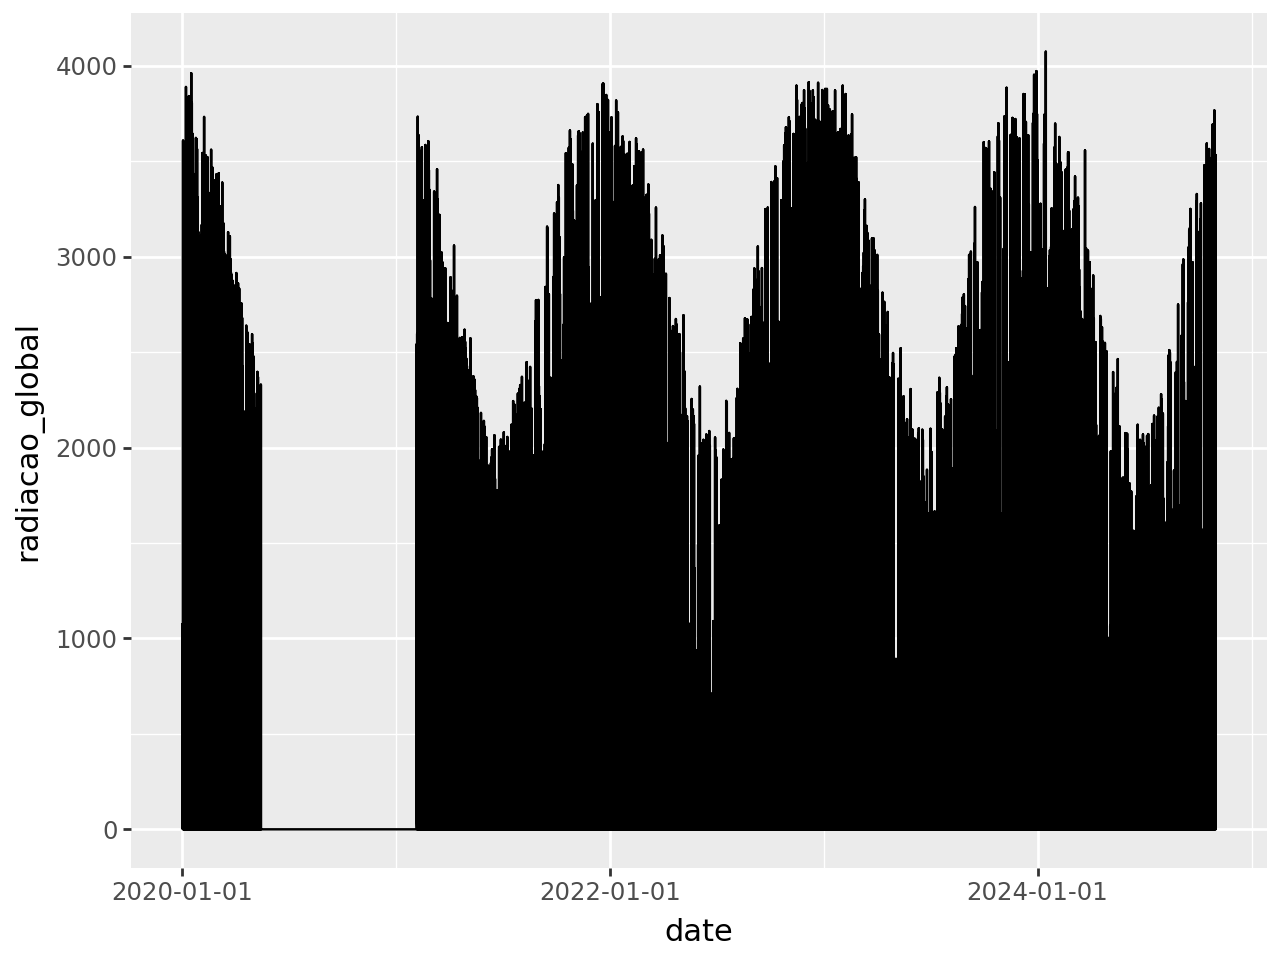

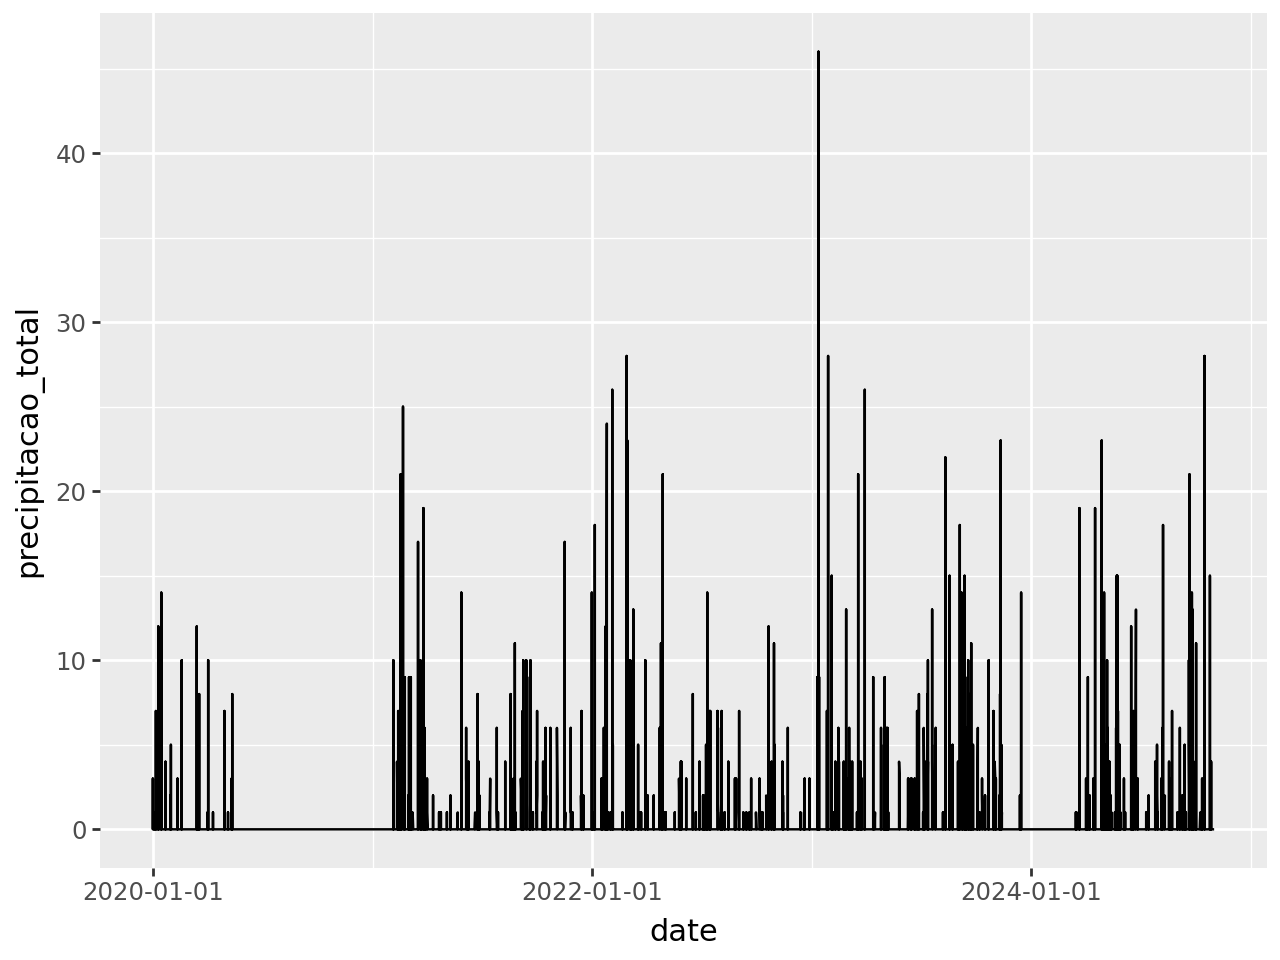

date,hora_utc,precipitacao_total,pressao_atmosferica,pressao_atmosferica_max,pressao_atmosferica_min,radiacao_global,temperatura_ar,temperatura_orvalho,temperatura_maxima,temperatura_minima,temperatura_orvalho_max,temperatura_orvalho_min,umidade_rel_max,umidade_rel_min,umidade_relativa,vento_direcao,vento_rajada_maxima,vento_velocidade,extra_data
datetime[ns],i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
2020-01-01 00:00:00,0,0,953,954,953,0,22,21,23,22,22,21,93,91,92,357,8,5,0
2020-01-01 00:00:00,0,0,954,954,953,0,22,21,22,22,21,21,95,92,95,349,8,4,0
2020-01-01 00:00:00,0,0,954,954,954,0,22,21,22,22,21,21,95,92,95,349,8,4,0
2020-01-01 00:00:00,0,0,953,954,953,0,21,21,22,21,21,21,96,95,96,330,8,4,0
2020-01-01 00:00:00,0,0,953,953,953,0,21,20,21,21,21,20,96,93,94,345,8,2,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-10-31 00:00:00,0,0,959,960,959,2427,25,17,26,25,18,17,64,58,62,75,11,5,0
2024-10-31 00:00:00,0,0,959,959,959,1703,23,17,25,23,17,17,67,62,66,68,13,5,0
2024-10-31 00:00:00,0,0,960,960,959,882,22,17,24,22,17,16,72,66,72,73,12,6,0


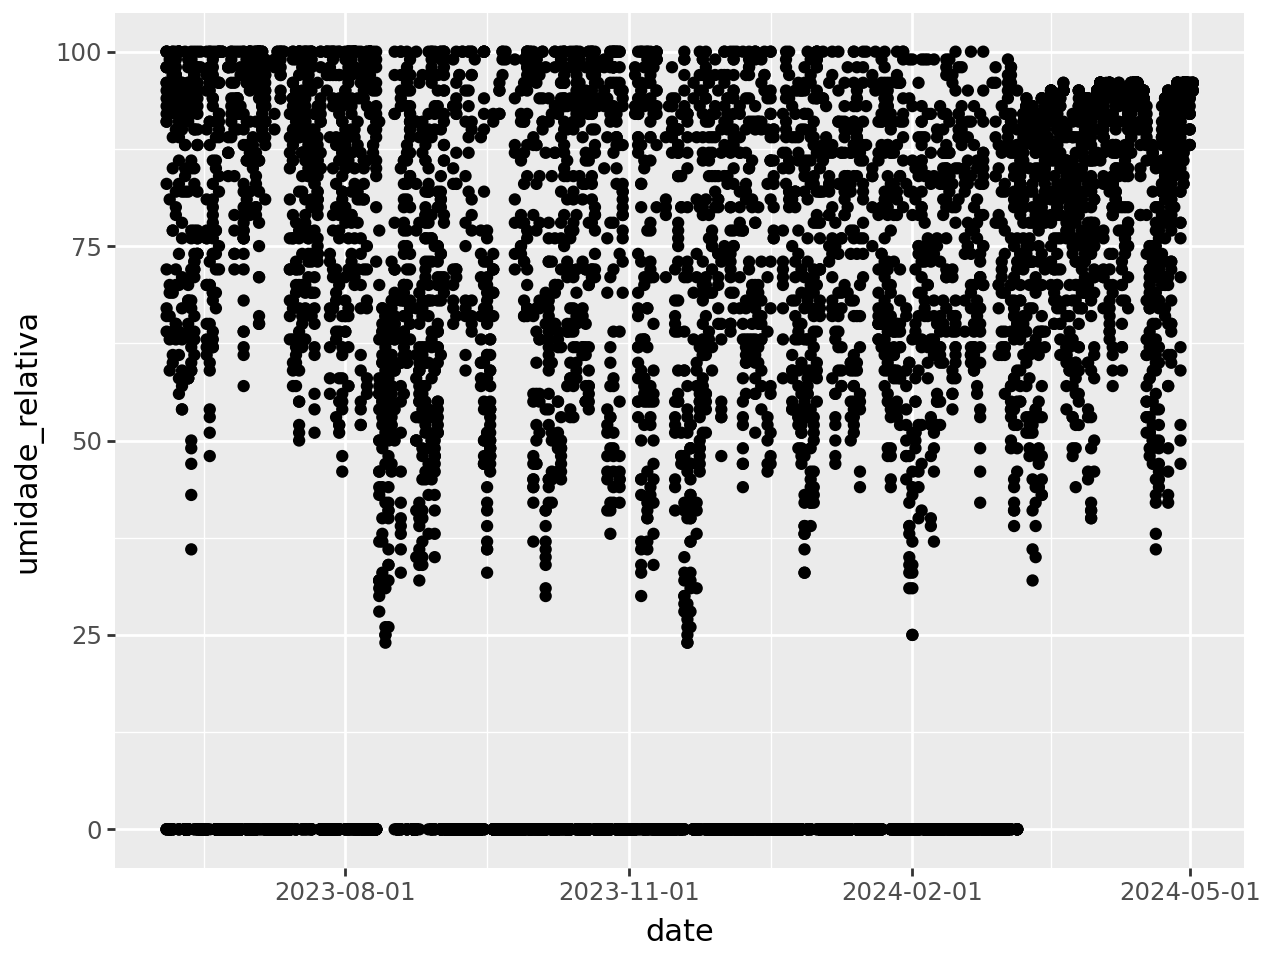

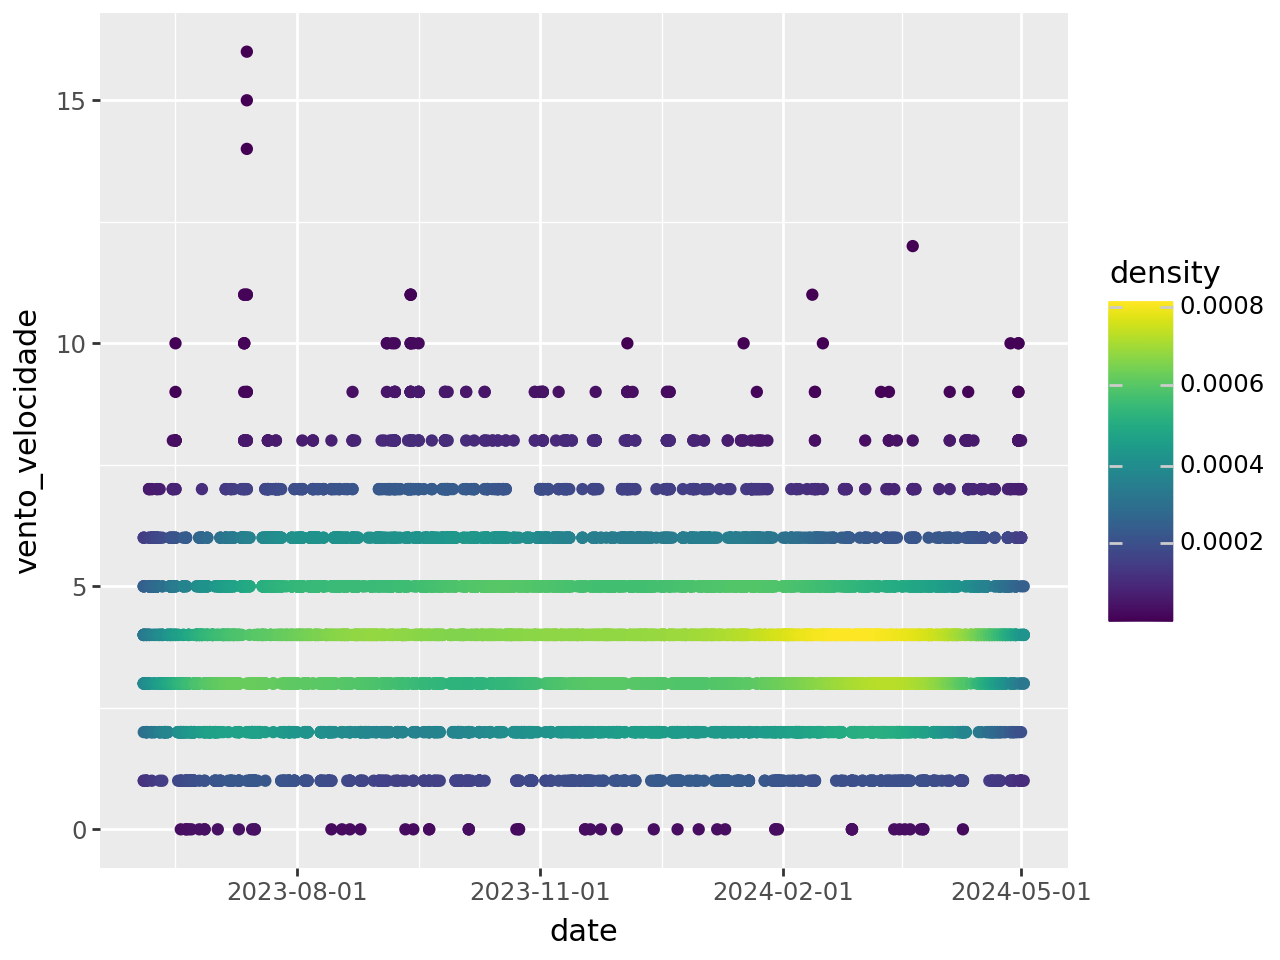

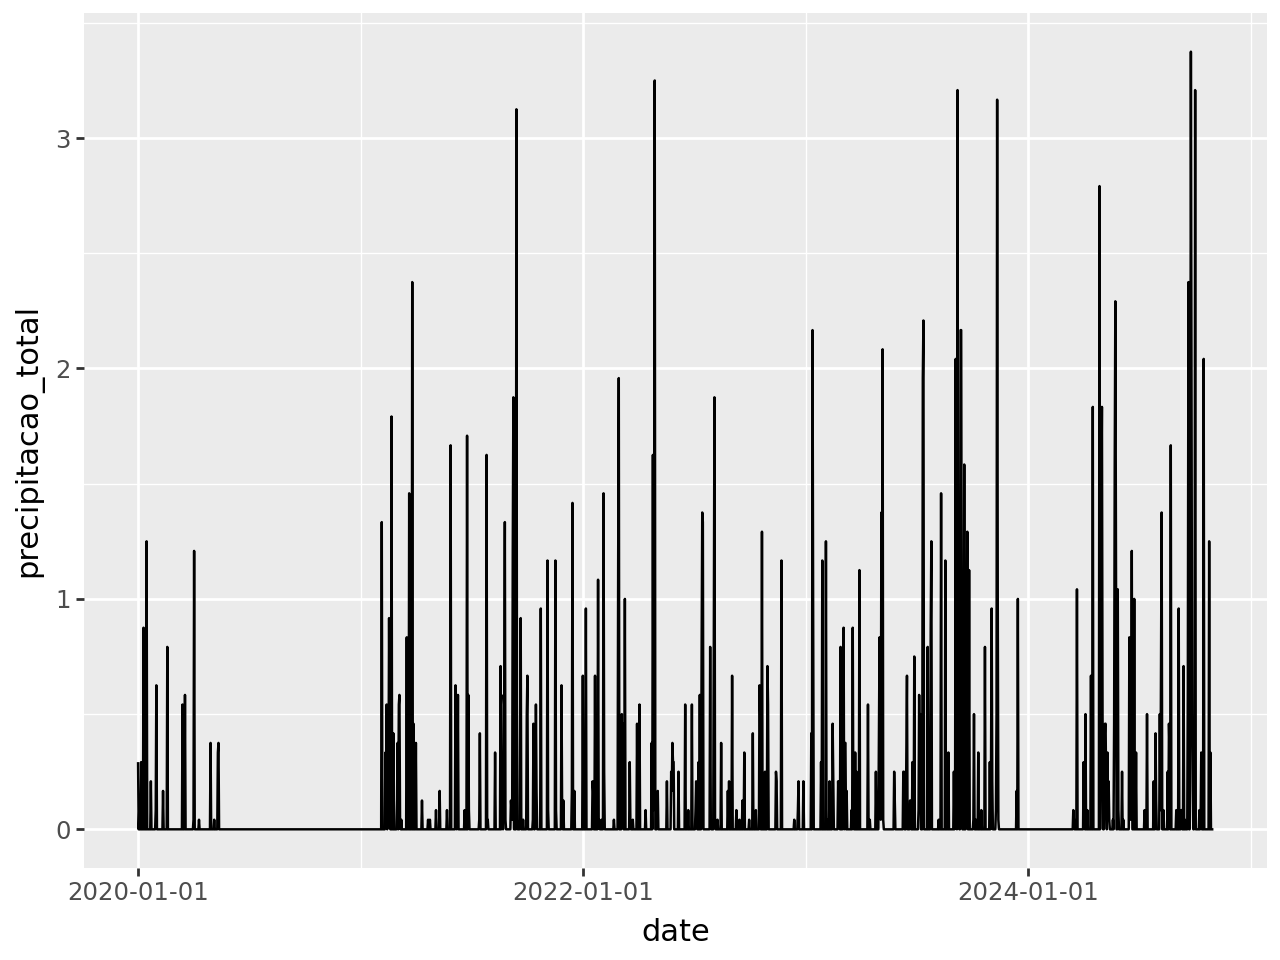

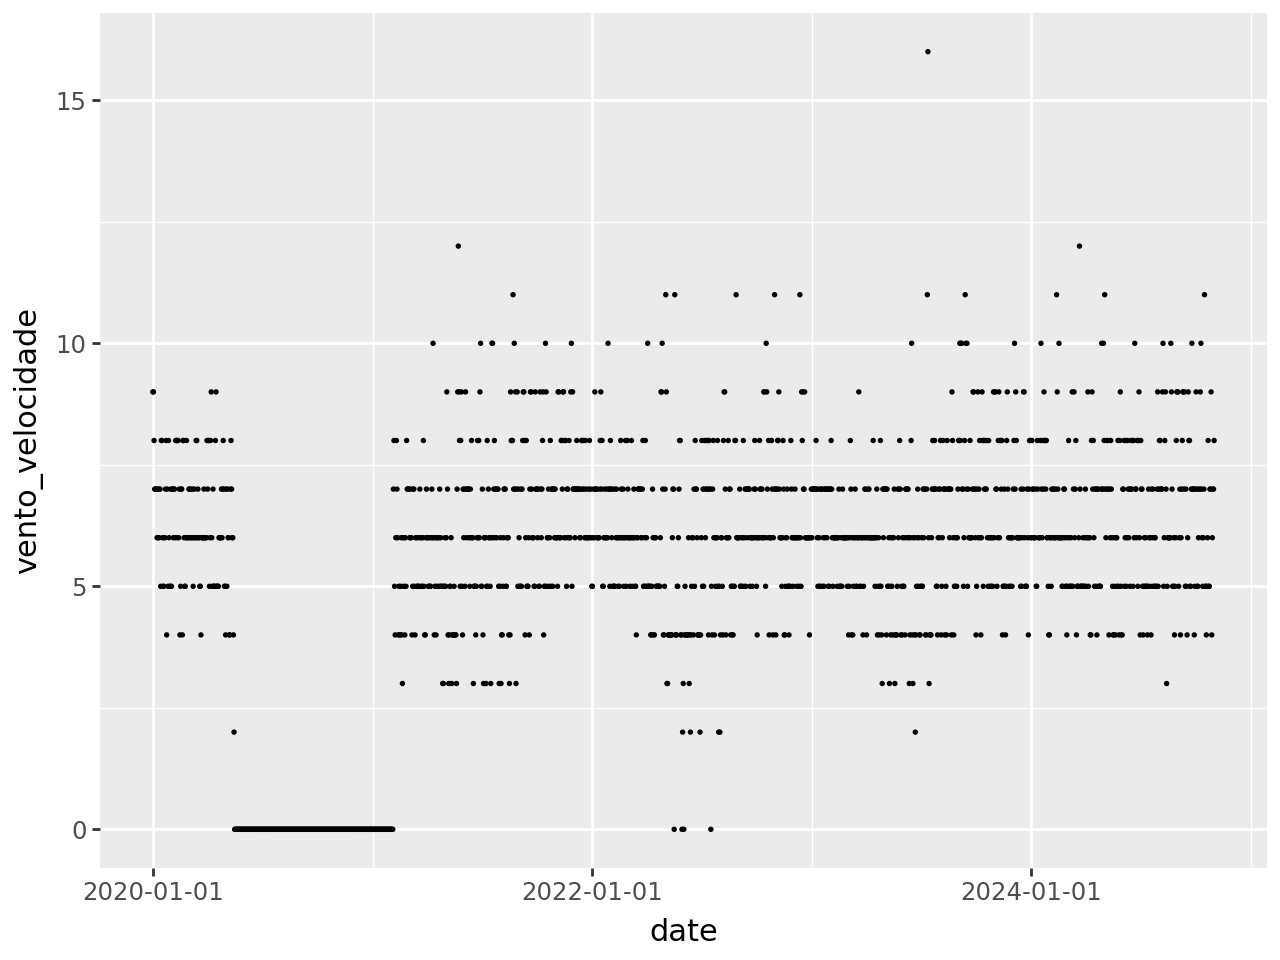

date,precipitacao_total,vento_velocidade,umidade_relativa
datetime[ns],f64,i64,f64
2020-01-01 00:00:00,0.291667,9,87.416667
2020-01-02 00:00:00,0.0,9,70.708333
2020-01-03 00:00:00,0.083333,8,88.375
2020-01-04 00:00:00,0.0,7,67.833333
2020-01-05 00:00:00,0.0,7,74.25
…,…,…,…
2024-10-27 00:00:00,0.0,4,55.916667
2024-10-28 00:00:00,0.0,6,70.25
2024-10-29 00:00:00,0.0,7,82.041667


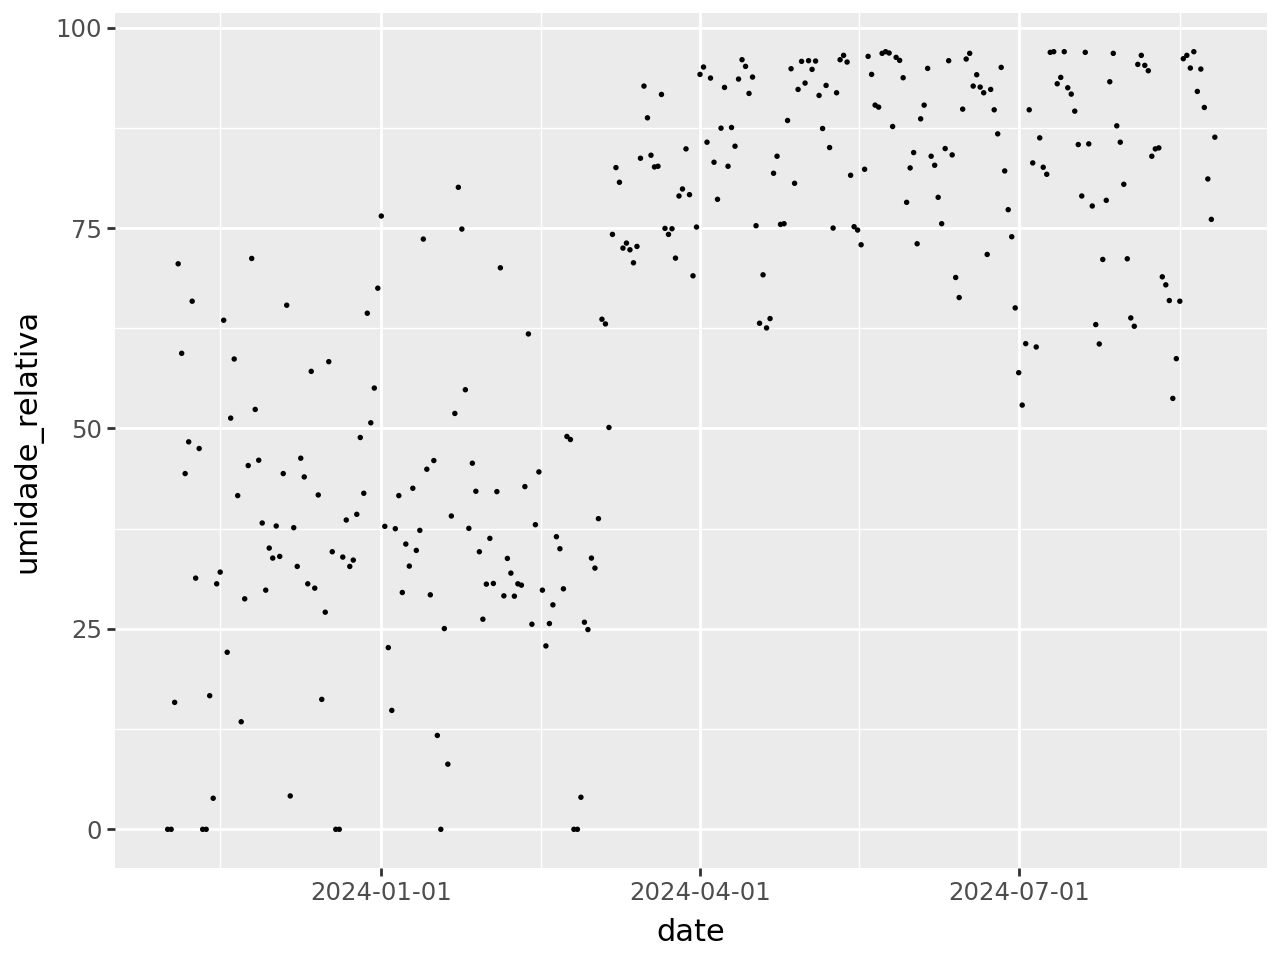

NameError: name 'combined_data' is not defined

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:99: PlotnineWarning: geom_path: Removed 9 rows containing missing values.


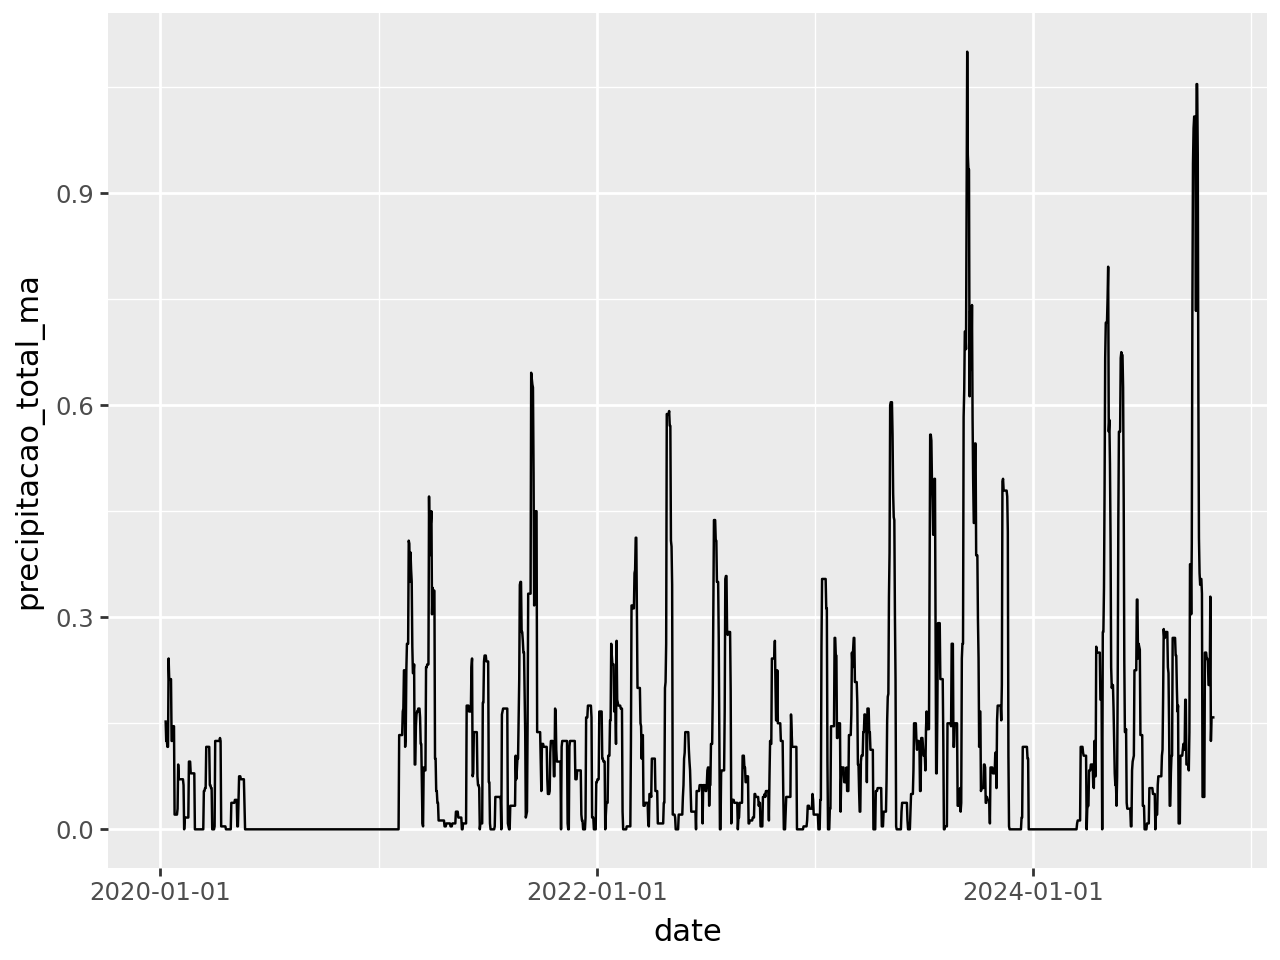

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


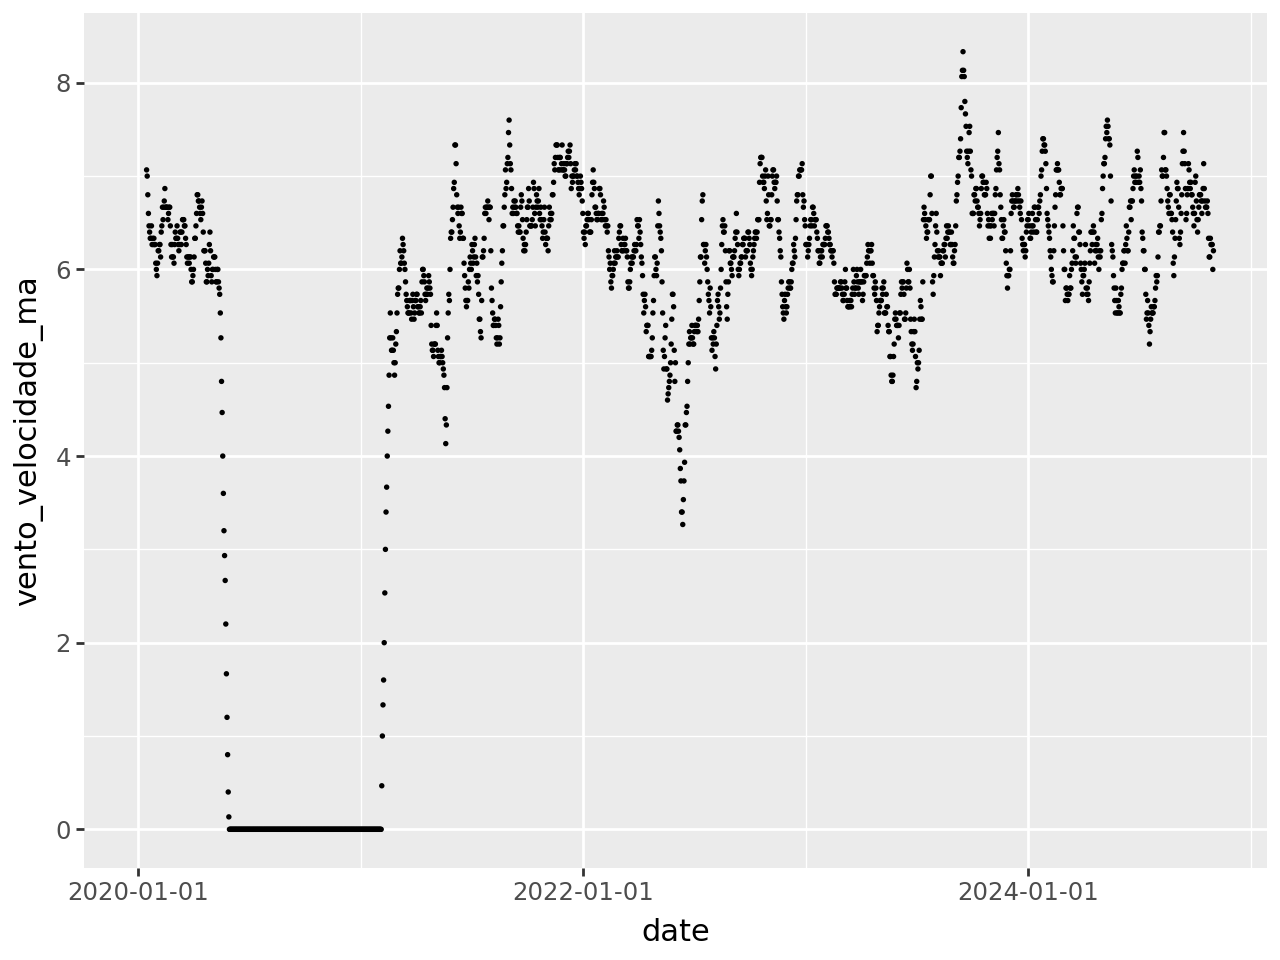

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


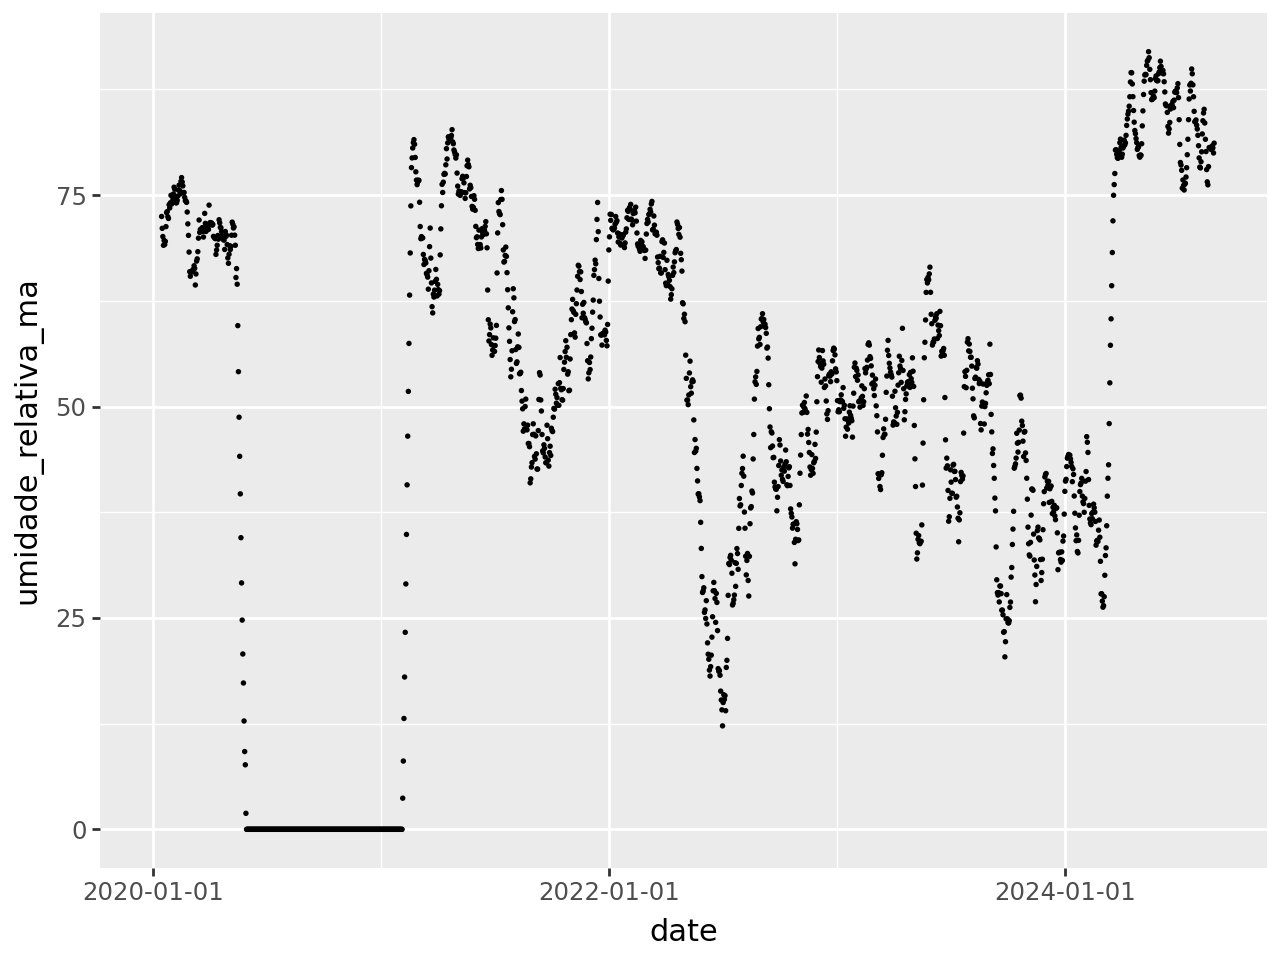